In [1]:
import numpy as np
import gym
import math
import torch as T
import random
from EnvGym import MyEnv
from sac_agent import SAC_Agent
import time
import matplotlib.pyplot as plt

In [2]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 6

dt = 1/ N_prices # time step

In [3]:
env = MyEnv(s0, sigma, dt, N_prices, A, k)

agent = SAC_Agent([3], env=env)

train_start = time.time()
epochs_start = time.time()

epoch_num = 10


train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):
    print("EPOCH: ", epoch)
    
    env.reset()


    # --------------------------------------------- now i have state I am at now
    done = False
    while not done:

        print("State now: ", env.state_now)

        action = agent.pick_action(env.state_now)
        print("Action I pick: ", action)
        print("Transformed action: ", 100*action[0], action[1])
        state_now = env.state_now
   
        # --------------------------------------------- now i also have action I would like to take
            
        state_next, reward, done, _, _ = env.step(action)

        print("State I arrived: ", env.state_now)
        print("Real state I arrived: ", env.state_now[0]*100, env.state_now[1], env.state_now[2]*100)
        print("Reward I gained: ", reward)


        agent.remember(state_now, action, reward, state_next, done)
        print()
    
    agent.learn()



    # save cumulative reward for epoch
    train_rewards[epoch] = env.reward_total
    print()


C:\Users\dusan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


br actions:  2
EPOCH:  0
State now:  (1.0, 1, 0)
Action I pick:  [0.02942897 0.02180252]
Transformed action:  2.9428966343402863 0.021802519
in update fun:  0.029428966 0.021802519
Bid:  2.931995375081897  Price:  10.0  Ask:  2.95
Hit Ask
State I arrived:  (1.0, 0.8333333333333334, 0.01)
Reward I gained:  -97.45445039686518

State now:  (1.0, 0.8333333333333334, 0.01)
Action I pick:  [0.01808585 0.02754636]
Transformed action:  1.8085848540067673 0.02754636
in update fun:  0.018085849 0.02754636
Bid:  1.7948116743937135  Price:  10.0  Ask:  1.82
Hit Ask
State I arrived:  (1.0048699879803498, 0.6666666666666667, 0.02)
Reward I gained:  -99.96813614337785

State now:  (1.0048699879803498, 0.6666666666666667, 0.02)
Action I pick:  [0.09042346 0.02812234]
Transformed action:  9.042346477508545 0.028122345
in update fun:  0.090423465 0.028122345
Bid:  9.028285305015743  Price:  10.05  Ask:  9.06
Hit Ask
State I arrived:  (0.998131218552722, 0.5000000000000001, 0.03)
Reward I gained:  -90.63

In [4]:
train_rewards


array([-532.90398348, -534.51394231, -557.91943878, -542.87798443,
       -579.90977113, -559.74881302, -545.54485727, -577.91055385,
       -543.99512865, -555.69443336])

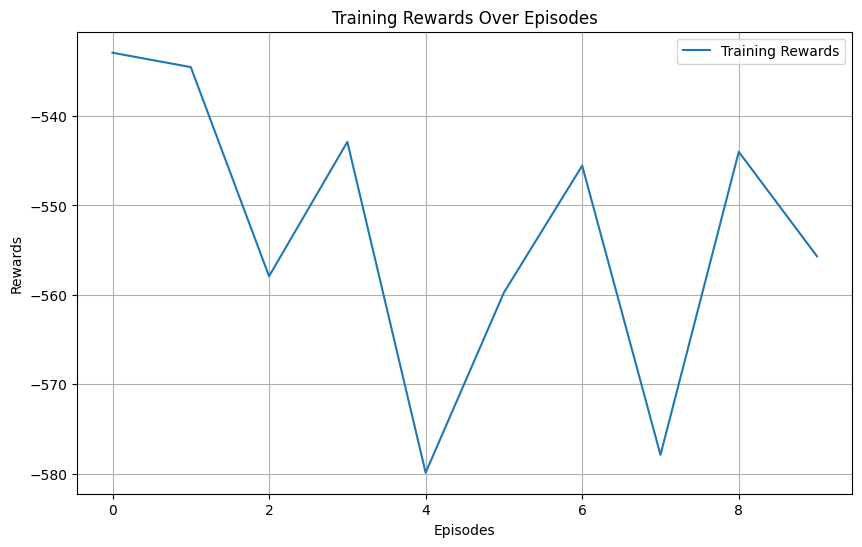

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(train_rewards, label='Training Rewards', linestyle='-')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid(True)
plt.savefig('training_rewards_plot.png')
plt.show()